In [1]:
import os
import pandas as pd
import numpy as np
import helpers
from CAI import RSCU, CAI

from sklearn.model_selection import train_test_split


In [13]:
#df = pd.read_csv('./data/cub.csv', index_col=0)
PATH='/lustre/isaac/proj/UTK0196/codon-expression-data/fullTableForTrainning/'

file = 'Musmusculus_fulltable.csv'

df = pd.read_csv(PATH+file)
df = helpers.clean(df, 'Sequence')
rscu_dict = RSCU(df['Sequence'].tolist())
CAIs = []
    
for seq in df['Sequence']:
    CAIs.append(CAI(seq, RSCUs=rscu_dict))
                
df['CAI2'] = CAIs

In [15]:
df.to_csv('./data/mouse_cai.csv')

In [9]:

dfs = []
for species in set(df['species']):
    _df = df[df['species'] == species] 
    _df = helpers.clean(_df, 'Sequence')
    rscu_dict = RSCU(_df['Sequence'].tolist())
    CAIs = []
    
    for seq in _df['Sequence']:
        CAIs.append(CAI(seq, RSCUs=rscu_dict))
        
    _df['CAI2'] = CAIs
    dfs.append(_df)
    
new_df = pd.concat(dfs)
new_df

KeyError: 'species'

In [4]:
new_df.to_csv('./data/cub2.csv')

In [2]:
PATH='/lustre/isaac/proj/UTK0196/codon-expression-data/fullTableForTrainning/'

filelist = os.listdir(PATH)
df_list = [pd.read_csv(PATH+file) for file in filelist]

In [ ]:

dfs = []
for df in df_list:
    df = helpers.clean(df, 'Sequence')
    rscu_dict = RSCU(df['Sequence'].tolist())
    CAIs = []
    
    for seq in df['Sequence']:
        CAIs.append(CAI(seq, RSCUs=rscu_dict))
        
    df['CAI'] = CAIs
    dfs.append(df)

df = pd.concat(dfs)

df = helpers.add_codons_to_df(df, 'Sequence')
df['median_exp'] = np.log(df['median_exp'])
#low, high = df.median_exp.quantile([0.33, 0.67])
#print(low, high)

#lengths = [len(elem) for elem in df['codons_cleaned']]
#df['seq_len'] = lengths

#df = df[df['seq_len'] < 100]

In [3]:
df = pd.read_csv('./cai.csv')

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1234)

In [5]:
prob_0 = []
prob_1 = []
prob_2 = []
pred_label = []

count = 0

for elem in df['codons_cleaned']:
    
    if count % 2000 == 0:
        print(count)
    
    count += 1
    
    if len(elem) > 1024:
        elem = elem[:1024]
    
    prediction = pipe([elem])
    pred = prediction[0]
    prob_0.append(pred[0]['score'])
    prob_1.append(pred[1]['score'])
    prob_2.append(pred[2]['score'])
    
    MAX = max([prob_0[-1], prob_1[-1], prob_2[-1]])
    
    if prob_0[-1] == MAX:
        pred_label.append(0)
    elif prob_1[-1] == MAX:
        pred_label.append(1)
    else:
        pred_label.append(2)
        
df['prob_0_multi'] = prob_0
df['prob_1_multi'] = prob_1
df['prob_2_multi'] = prob_2
df['pred_multi'] = pred_label

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000


In [9]:
tokenizer_name = "./tokenizers/codonBERT2"
model_name = "./models/codonBERT-binary_1/checkpoint-99500"

tokenizer = AutoTokenizer.from_pretrained(tokenizer_name, token_type_ids=False, truncation=True, padding=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name).cpu()

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)

`return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.


In [10]:
prob_0 = []
prob_1 = []
pred_label = []

count = 0

for elem in df['codons_cleaned']:
    
    if count % 2000 == 0:
        print(count)
    
    count += 1
    
    if len(elem) > 1024:
        elem = elem[:1024]
    
    prediction = pipe([elem])
    pred = prediction[0]
    prob_0.append(pred[0]['score'])
    prob_1.append(pred[1]['score'])
    
    MAX = max([prob_0[-1], prob_1[-1]])
    
    if prob_0[-1] == MAX:
        pred_label.append(0)
    elif prob_1[-1] == MAX:
        pred_label.append(1)

        
df['prob_0_binary'] = prob_0
df['prob_1_binary'] = prob_1
df['pred_binary'] = pred_label

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000


In [11]:
df

Unnamed: 0 GeneName  median_exp  \
0               0    Gnai3    3.555348   
1               1    Cdc45    0.371564   
2               2    Scml2    0.000000   
3               3     Apoh   -2.302585   
4               4     Narf    2.302585   
...           ...      ...         ...   
70735        5031     OPT2    2.079442   
70736        5032     SGE1    4.094345   
70737        5033     ARR1    3.663562   
70738        5034     ARR2    2.564949   
70739        5035     ARR3    2.302585   

                                                Sequence       CAI  \
0      ATGGGCTGCACGTTGAGCGCCGAGGACAAGGCGGCGGTGGAGCGGA...  0.741979   
1      ATGTTCGTGACCGATTTCCGCAAGGAGTTCTACGAGACGGTCCACA...  0.769123   
2      ATGGCAGAGCCTGCCACTGGAGTGCAACTTGCTGGTTCTGGAGAGC...  0.726407   
3      ATGGTTTCCCCGGTGCTCGCCTTGTTCTCCGCCTTCCTCTGCCATG...  0.768817   
4      ATGAAGTGTGAGCACTGCACACGAAAGGAATGTAGTAAAAAATCAA...  0.790900   
...                                                  ...       ...   
70735  ATGAGTGAAACAGTCAAAGATAAAGTTATAATTGATGAGAAGGTAT...  0.762819   
70736  ATGAAGAGTACTTTGAGTTTAACTTTATGTGTTATATCGCTTCTAT...  0.717415   
70737  ATGGCAAAACCGCGTGGAAGAAAAGGCGGCAGGAAGCCTTCACTTA...  0.702569   
70738  ATGGTAAGTTTCATAACGTCTAGGCAACTCAAGGGCCTAATTGAAA...  0.743733   
70739  ATGTCAGAAGATCAAAAAAGTGAAAATTCGGTACCTTCTAAGGTTA...  0.730102   

                                          codons_cleaned  prob_0_multi  \
0      ATG GGC TGC ACG TTG AGC GCC GAG GAC AAG GCG GC...      0.999378   
1      ATG TTC GTG ACC GAT TTC CGC AAG GAG TTC TAC GA...      0.813531   
2      ATG GCA GAG CCT GCC ACT GGA GTG CAA CTT GCT GG...      0.178997   
3      ATG GTT TCC CCG GTG CTC GCC TTG TTC TCC GCC TT...      0.994777   
4      ATG AAG TGT GAG CAC TGC ACA CGA AAG GAA TGT AG...      0.991135   
...                                                  ...           ...   
70735  ATG AGT GAA ACA GTC AAA GAT AAA GTT ATA ATT GA...      0.003637   
70736  ATG AAG AGT ACT TTG AGT TTA ACT TTA TGT GTT AT...      0.000543   
70737  ATG GCA AAA CCG CGT GGA AGA AAA GGC GGC AGG AA...      0.004290   
70738  ATG GTA AGT TTC ATA ACG TCT AGG CAA CTC AAG GG...      0.001369   
70739  ATG TCA GAA GAT CAA AAA AGT GAA AAT TCG GTA CC...      0.001470   

       prob_1_multi  prob_2_multi  pred_multi  prob_0_binary  prob_1_binary  \
0          0.000299      0.000323           0       0.006524       0.993476   
1          0.069915      0.116554           0       0.005177       0.994823   
2          0.804915      0.016088           1       0.003801       0.996199   
3          0.003869      0.001353           0       0.015304       0.984696   
4          0.007790      0.001074           0       0.005253       0.994747   
...             ...           ...         ...            ...            ...   
70735      0.996265      0.000097           1       0.005703       0.994297   
70736      0.999429      0.000028           1       0.999546       0.000454   
70737      0.995237      0.000473           1       0.996156       0.003844   
70738      0.998516      0.000114           1       0.000803       0.999197   
70739      0.998389      0.000141           1       0.994998       0.005002   

       pred_binary  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
70735            1  
70736            0  
70737            0  
70738            1  
70739            0  

[70740 rows x 13 columns]

In [4]:
df.to_csv('full.csv')

NameError: name 'df' is not defined

In [5]:
for file in filelist:
    print(file)

Musmusculus_fulltable.csv
Saccharomyces_Cerevisiae_s288c_fulltable.csv
celegan_fulltable.csv
atha_fulltable.csv
ecoli_fulltable.csv
Drosophila_Melanogaster_fulltable.csv
yeasts288c_fulltable.csv


In [7]:
df = pd.read_csv('./data/full.csv')
df['actual_binary'] = np.where(df['median_exp'] > np.median(df['median_exp'].values), 1, 0)

low, high = df.median_exp.quantile([0.33, 0.67])
high_l = np.where(df['median_exp'] > high, 2, 0)
low_l = np.where(df['median_exp'] > low, 0, 1)
df['actual_multi'] = high_l+low_l

In [9]:
s = []
for file, _df in zip(filelist, df_list):
    species = file.partition('_')[0]
    l = [species]*len(_df)
    s.extend(l)
    
print(len(s), len(df))

71820 70740


In [10]:
df2 = pd.concat(df_list)
df2['species'] = s

In [15]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'GeneName', 'median_exp', 'Sequence',
       'CAI', 'codons_cleaned', 'prob_0_multi', 'prob_1_multi', 'prob_2_multi',
       'pred_multi', 'prob_0_binary', 'prob_1_binary', 'pred_binary',
       'actual_binary', 'actual_multi'],
      dtype='object')

In [24]:
df = df.merge(df2, how='right', right_on='GeneName', left_on='GeneName')

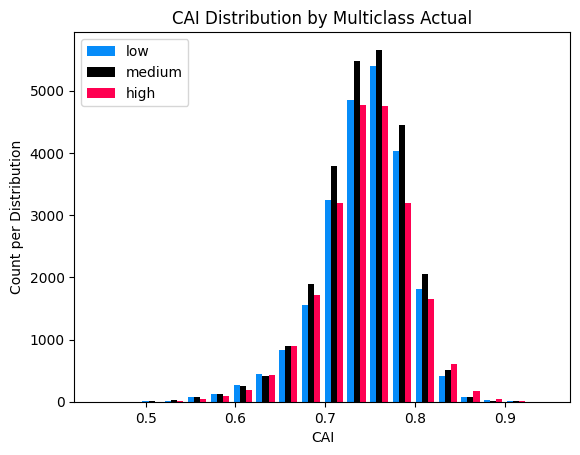

In [49]:
import matplotlib.pyplot as plt

a = df.loc[df['pred_multi'] == 0, 'CAI']
b = df.loc[df['pred_multi'] == 1, 'CAI']
c = df.loc[df['pred_multi'] == 2, 'CAI']

plt.hist([b, a, c], bins=20, label=['low', 'medium', 'high'], color=['#068cf9', 'black', '#ff0051'])

plt.legend(loc='upper left')
plt.title('CAI Distribution by Multiclass Actual')
plt.xlabel('CAI')
plt.ylabel('Count per Distribution')

plt.show()

In [26]:
from scipy.stats import ttest_ind

print(ttest_ind(a, b, permutations=50, random_state=10))
print(ttest_ind(a, c, permutations=50, random_state=10))
print(ttest_ind(b, c, permutations=50, random_state=10))

Ttest_indResult(statistic=19.18376041689124, pvalue=0.0196078431372549)
Ttest_indResult(statistic=-25.42028356801976, pvalue=0.0196078431372549)
Ttest_indResult(statistic=-38.12474533910848, pvalue=0.0196078431372549)


In [28]:
for species in set(df['species']):
    print(species)
    _df = df[df['species'] == species]

    a = _df.loc[_df['actual_multi'] == 0, 'CAI']
    b = _df.loc[_df['actual_multi'] == 1, 'CAI']
    c = _df.loc[_df['actual_multi'] == 2, 'CAI']

    print(ttest_ind(a, b, permutations=50, random_state=10))
    print(ttest_ind(a, c, permutations=50, random_state=10))
    print(ttest_ind(b, c, permutations=50, random_state=10))
    print()

Drosophila
Ttest_indResult(statistic=17.965736082032805, pvalue=0.0196078431372549)
Ttest_indResult(statistic=-21.659006021740822, pvalue=0.0196078431372549)
Ttest_indResult(statistic=-33.410832974834335, pvalue=0.0196078431372549)

ecoli
Ttest_indResult(statistic=-1.6496721255015356, pvalue=0.0784313725490196)
Ttest_indResult(statistic=-4.325475435085102, pvalue=0.0196078431372549)
Ttest_indResult(statistic=0.1853653222282944, pvalue=0.7450980392156863)

celegan
Ttest_indResult(statistic=2.4785540786183407, pvalue=0.0196078431372549)
Ttest_indResult(statistic=-2.482572846292857, pvalue=0.0392156862745098)
Ttest_indResult(statistic=-4.673022818414506, pvalue=0.0196078431372549)

atha
Ttest_indResult(statistic=4.0500800458391355, pvalue=0.0196078431372549)
Ttest_indResult(statistic=5.357305683705957, pvalue=0.0196078431372549)
Ttest_indResult(statistic=0.888758557997845, pvalue=0.49019607843137253)

yeasts288c
Ttest_indResult(statistic=-4.619645691073873, pvalue=0.0196078431372549)
Ttes

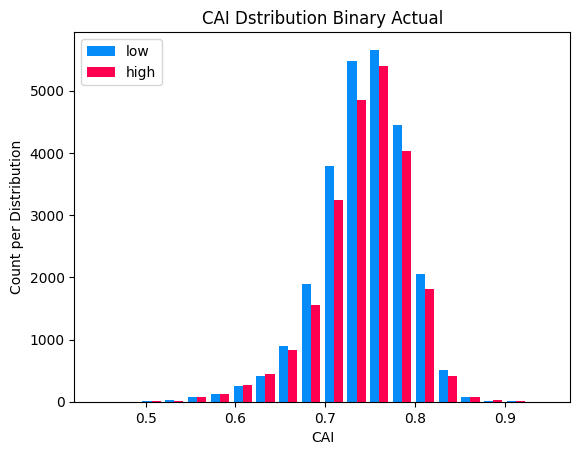

In [47]:
a = df.loc[df['pred_multi'] == 0, 'CAI']
b = df.loc[df['pred_multi'] == 1, 'CAI']

plt.hist([a, b], bins=20, label=['low', 'high'], color=['#068cf9', '#ff0051'])
plt.legend(loc='upper left')

plt.title('CAI Dstribution Binary Actual')
plt.xlabel('CAI')
plt.ylabel('Count per Distribution')

plt.show()

In [48]:
from scipy.stats import ttest_ind

ttest_ind(a, b, permutations=50, random_state=10)

Ttest_indResult(statistic=0.1898998274999093, pvalue=0.8627450980392157)

In [31]:
for species in set(df['species']):
    print(species)
    _df = df[df['species'] == species]
    
    a = df.loc[df['actual_multi'] == 0, 'CAI']
    b = df.loc[df['actual_multi'] == 1, 'CAI']

    print(ttest_ind(a, b, permutations=50, random_state=10))
    print()

Drosophila
Ttest_indResult(statistic=-1.3056911419833501, pvalue=0.19607843137254902)

ecoli
Ttest_indResult(statistic=-1.3056911419833501, pvalue=0.19607843137254902)

celegan
Ttest_indResult(statistic=-1.3056911419833501, pvalue=0.19607843137254902)

atha
Ttest_indResult(statistic=-1.3056911419833501, pvalue=0.19607843137254902)

yeasts288c
Ttest_indResult(statistic=-1.3056911419833501, pvalue=0.19607843137254902)

Saccharomyces
Ttest_indResult(statistic=-1.3056911419833501, pvalue=0.19607843137254902)

Musmusculus
Ttest_indResult(statistic=-1.3056911419833501, pvalue=0.19607843137254902)



In [16]:
import importlib
importlib.reload(helpers)

<module 'helpers' from '/lustre/isaac/scratch/ababjac/codon-sentiment-score/helpers.py'>

In [22]:
df.to_csv('./cai.csv')

In [6]:
df.median_exp.quantile([0.5])

0.5    2.014903
Name: median_exp, dtype: float64

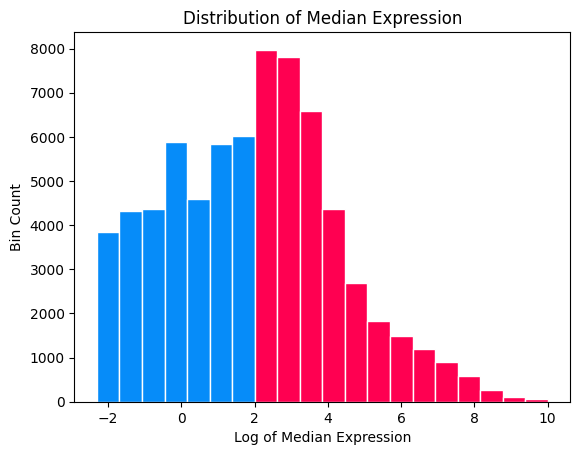

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
N, bins, patches = ax.hist(df['median_exp'], edgecolor='white', linewidth=1, bins=20)

for i in range(0,7):
    patches[i].set_facecolor('#068cf9')
# for i in range(5,9):    
#     patches[i].set_facecolor('black')
for i in range(7, len(patches)):
    patches[i].set_facecolor('#ff0051')

plt.title('Distribution of Median Expression')
plt.xlabel('Log of Median Expression')
plt.ylabel('Bin Count')
plt.show()